In [4]:
pip install pandas_datareader


Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data = pdr.get_data_yahoo("AAPL", start="2023-01-01", end="2023-05-20")

[*********************100%***********************]  1 of 1 completed


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
from pandas_datareader import data as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
df = pdr.get_data_yahoo("TSLA", start="2010-01-01", end="2020-12-31")

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-23,210.733337,217.166672,207.523331,215.326660,215.326660,99519000
2020-12-24,214.330002,222.029999,213.666672,220.589996,220.589996,68596800
2020-12-28,224.836670,227.133331,220.266663,221.229996,221.229996,96835800
2020-12-29,220.333328,223.300003,218.333328,221.996674,221.996674,68732400
2020-12-30,224.000000,232.199997,222.786667,231.593338,231.593338,128538000


In [8]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [9]:
df=df.drop(['Date' ,'Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500


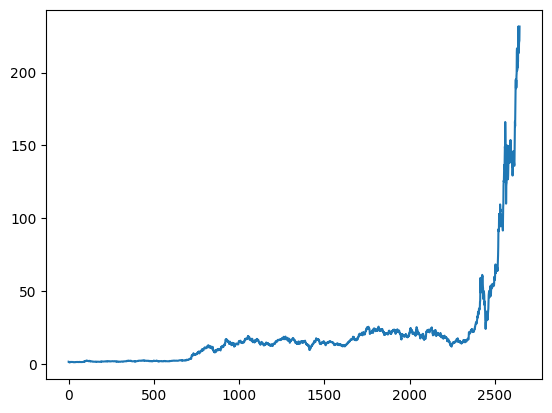

In [10]:
plt.plot(df.Close)

In [23]:
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2641    151.068746
2642    152.283313
2643    153.505599
2644    154.732513
2645    156.079973
Name: Close, Length: 2646, dtype: float64

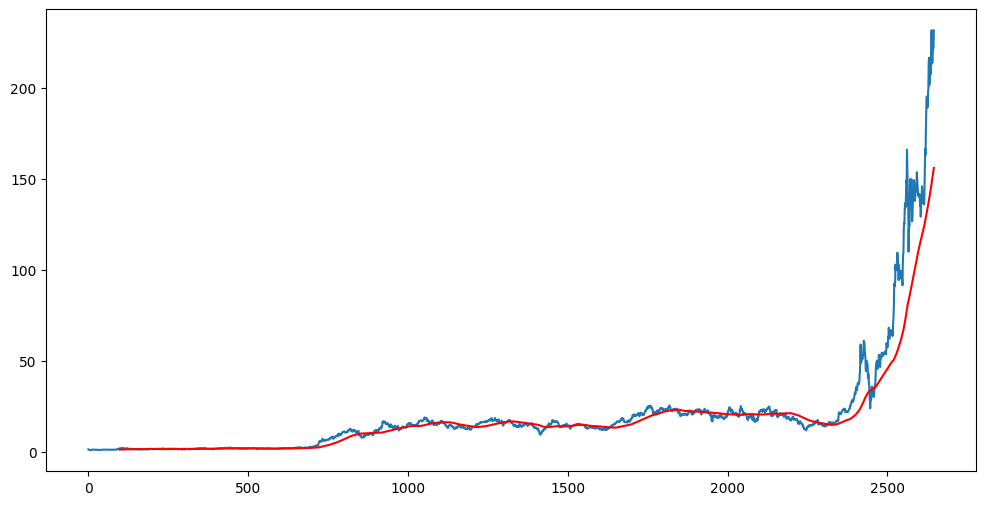

In [24]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')

In [25]:
ma200=df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2641    106.026416
2642    106.942516
2643    107.866460
2644    108.828086
2645    109.842653
Name: Close, Length: 2646, dtype: float64

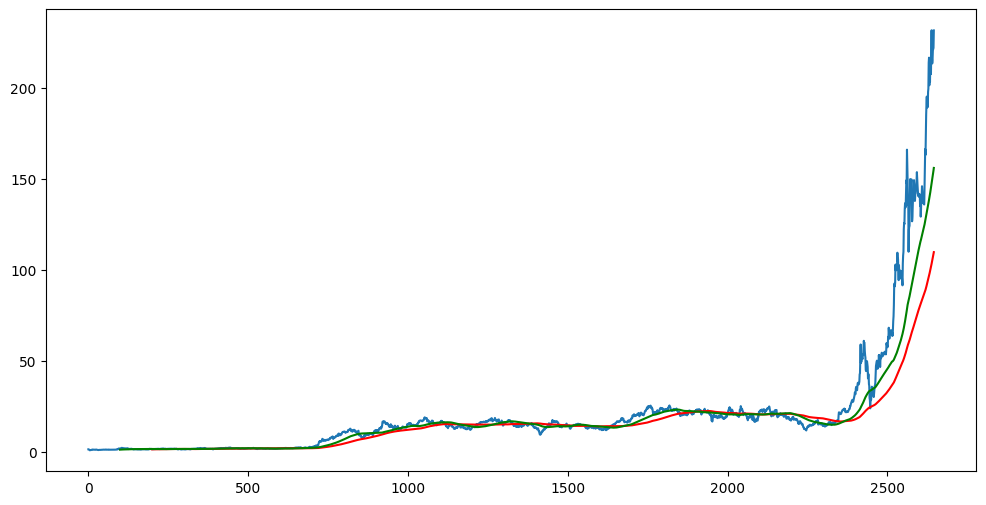

In [26]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200,'red')
plt.plot(ma100,'green')

In [27]:
df.shape

(2646, 5)

In [28]:
#Spliting Data into Training and Testing 

data_training =pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(1852, 1)
(794, 1)


In [29]:
data_training.head()


,Close
0,1.592667
1,1.588667
2,1.464000
3,1.280000
4,1.074000


In [30]:
data_testing.head()

,Close
1852,20.406000
1853,20.185333
1854,20.403334
1855,20.292667
1856,20.199333


In [31]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [32]:
#scalling the Data 

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))



In [33]:
data_traning_array=scaler.fit_transform(data_training)
data_traning_array

array([[0.02191227],
       [0.02174975],
       [0.01668473],
       ...,
       [0.85517328],
       [0.82686883],
       [0.7677681 ]])

In [34]:
x_train = []
y_train = []

for i in range(100, data_traning_array.shape[0]):
    x_train.append(data_traning_array[i-100:i])
    y_train.append(data_traning_array[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)


In [35]:
x_train

array([[[2.19122659e-02],
        [2.17497545e-02],
        [1.66847339e-02],
        ...,
        [4.06283831e-02],
        [3.75677252e-02],
        [3.70801812e-02]],

       [[2.17497545e-02],
        [1.66847339e-02],
        [9.20911077e-03],
        ...,
        [3.75677252e-02],
        [3.70801812e-02],
        [3.81636182e-02]],

       [[1.66847339e-02],
        [9.20911077e-03],
        [8.39665043e-04],
        ...,
        [3.70801812e-02],
        [3.81636182e-02],
        [4.11430204e-02]],

       ...,

       [[9.25027022e-01],
        [9.29604504e-01],
        [9.75487498e-01],
        ...,
        [8.40655445e-01],
        [8.26300039e-01],
        [8.24160316e-01]],

       [[9.29604504e-01],
        [9.75487498e-01],
        [9.88244777e-01],
        ...,
        [8.26300039e-01],
        [8.24160316e-01],
        [8.55173276e-01]],

       [[9.75487498e-01],
        [9.88244777e-01],
        [9.73835280e-01],
        ...,
        [8.24160316e-01],
        [8.5517

In [36]:
#ML Model 


In [37]:
from keras.layers import Dense, Dropout ,LSTM
from keras.models import Sequential

In [38]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))



model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))




In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [40]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
55/55 [==============================] - 20s 199ms/step - loss: 0.0458
Epoch 2/50
55/55 [==============================] - 10s 179ms/step - loss: 0.0084
Epoch 3/50
55/55 [==============================] - 10s 186ms/step - loss: 0.0077
Epoch 4/50
55/55 [==============================] - 10s 180ms/step - loss: 0.0080
Epoch 5/50
55/55 [==============================] - 10s 179ms/step - loss: 0.0071
Epoch 6/50
55/55 [==============================] - 10s 188ms/step - loss: 0.0078
Epoch 7/50
55/55 [==============================] - 10s 183ms/step - loss: 0.0063
Epoch 8/50
55/55 [==============================] - 10s 189ms/step - loss: 0.0060
Epoch 9/50
55/55 [==============================] - 11s 197ms/step - loss: 0.0064
Epoch 10/50
55/55 [==============================] - 11s 202ms/step - loss: 0.0060
Epoch 11/50
55/55 [==============================] - 11s 200ms/step - loss: 0.0061
Epoch 12/50
55/55 [==============================] - 10s 186ms/step - loss: 0.0071
Epoch 13/50
5

In [41]:
model.save('keras_model.h5')

In [42]:
data_testing.head()

,Close
1852,20.406000
1853,20.185333
1854,20.403334
1855,20.292667
1856,20.199333


In [43]:
past_100_days=data_training.tail(100)


In [44]:
final_df=past_100_days.append(data_testing,ignore_index=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3188\3595571042.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [45]:
final_df.head()

,Close
0,25.377333
1,25.022667
2,24.760000
3,24.653334
4,24.816000


In [46]:

scaler=MinMaxScaler(feature_range=(0,1))
input_data=scaler.fit_transform(final_df)
input_data

array([[0.0611918 ],
       [0.05957774],
       [0.05838236],
       [0.05789693],
       [0.05863721],
       [0.05989933],
       [0.06178342],
       [0.06203827],
       [0.06023004],
       [0.0556427 ],
       [0.05833381],
       [0.0551512 ],
       [0.05541211],
       [0.05268459],
       [0.04493891],
       [0.03939892],
       [0.04073082],
       [0.04158943],
       [0.04497836],
       [0.04567617],
       [0.04382242],
       [0.04514825],
       [0.04265738],
       [0.04528782],
       [0.0443837 ],
       [0.04579752],
       [0.04533636],
       [0.04962031],
       [0.04873439],
       [0.05002381],
       [0.04717493],
       [0.04736   ],
       [0.04384062],
       [0.04265738],
       [0.04457484],
       [0.05100682],
       [0.05398616],
       [0.05345825],
       [0.05650737],
       [0.05599463],
       [0.05352803],
       [0.05427742],
       [0.05607655],
       [0.05563056],
       [0.05580653],
       [0.05247221],
       [0.05111907],
       [0.048

In [47]:
input_data.shape

(894, 1)

In [48]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test = np.array(x_test)
y_test = np.array(y_test)


In [49]:
print(x_test.shape)
print(y_test.shape)

(794, 100, 1)
(794,)


In [50]:
#Making prediction 

y_predicted=model.predict(x_test)


25/25 [==============================] - 3s 77ms/step


In [51]:
y_predicted.shape

(794, 1)

In [52]:
y_test

array([0.03856761, 0.03756337, 0.03855548, 0.03805184, 0.03762709,
       0.03762709, 0.04139222, 0.03935947, 0.0401483 , 0.04051237,
       0.04128603, 0.03937161, 0.0421234 , 0.04054272, 0.04143773,
       0.04182001, 0.04204452, 0.03900753, 0.03940498, 0.03870111,
       0.03829759, 0.0378425 , 0.04074296, 0.04013009, 0.04131031,
       0.0454911 , 0.04916824, 0.04856145, 0.04821558, 0.04990246,
       0.04851291, 0.04615553, 0.04551233, 0.04632543, 0.0443655 ,
       0.04196564, 0.04025145, 0.04138009, 0.04016347, 0.04294864,
       0.0419535 , 0.04115557, 0.04175023, 0.04776656, 0.04694132,
       0.04727809, 0.04823379, 0.04770891, 0.04887395, 0.05102805,
       0.05024226, 0.05189577, 0.05236299, 0.05273617, 0.05064275,
       0.04813973, 0.04972042, 0.0517471 , 0.05062151, 0.05319733,
       0.05166215, 0.04999348, 0.04677143, 0.04702628, 0.05037272,
       0.04134064, 0.03988132, 0.04149235, 0.04389827, 0.04348868,
       0.04705661, 0.04748743, 0.04726899, 0.046823  , 0.05072

In [53]:
y_predicted

array([[0.06327556],
       [0.06314835],
       [0.06299704],
       [0.06282139],
       [0.06262234],
       [0.06240191],
       [0.06216305],
       [0.06191054],
       [0.06165001],
       [0.0613876 ],
       [0.06112975],
       [0.06088278],
       [0.06065211],
       [0.06044263],
       [0.06025808],
       [0.06010118],
       [0.05997361],
       [0.05987601],
       [0.05980733],
       [0.05976498],
       [0.05974525],
       [0.05974355],
       [0.05975479],
       [0.05977461],
       [0.05979933],
       [0.05982639],
       [0.05985525],
       [0.05988795],
       [0.05992794],
       [0.05997917],
       [0.0600456 ],
       [0.06013033],
       [0.06023443],
       [0.06035697],
       [0.06049536],
       [0.06064558],
       [0.06080183],
       [0.06095709],
       [0.06110412],
       [0.06123593],
       [0.0613472 ],
       [0.06143406],
       [0.06149414],
       [0.06152657],
       [0.0615335 ],
       [0.06151921],
       [0.06148946],
       [0.061

In [54]:
scaler.scale_

array([0.00455093])

In [55]:
scale_factor=1/0.00988704
y_predicted=y_predicted * scale_factor
y_test=y_test * scale_factor

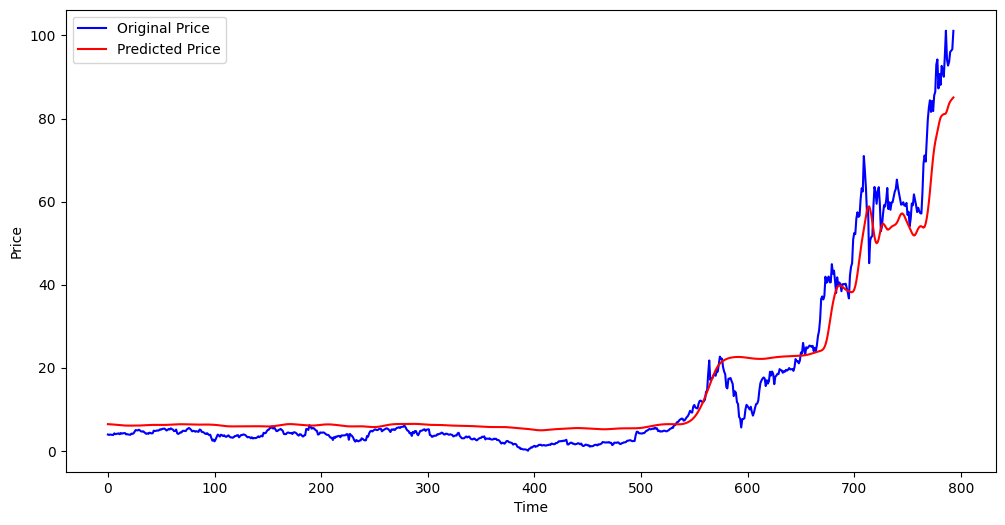

In [56]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted ,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming you have the true labels in 'y_true' and predicted labels in 'y_pred'
mse = mean_squared_error(y_test, y_predicted)
mae = mean_absolute_error(y_test, y_predicted)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 26.73891842077061
Mean Absolute Error: 3.6546128841372414


In [5]:
import tensorflow as tf


In [6]:
import tensorflow as tf
print(tf.__version__)


2.12.0
